<a href="https://colab.research.google.com/github/sdw81219/ML-CyberSec/blob/main/Sign_Language_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
train_df = pd.read_csv("sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
pd.DataFrame({
    'X': ['Train Shape','Different number of labels','Different number of labels (Sum)' ],
    'Y': [train_df.shape, train_df.label.unique(), len(train_df.label.unique())],
})

,X,Y
0,Train Shape,"(27455, 785)"
1,Different number of labels,"[3, 6, 2, 13, 16, 8, 22, 18, 10, 20, 17, 19, 2..."
2,Different number of labels (Sum),24


In [8]:
NUM_CATEGORIES = len(train_df.label.unique())
NUM_CATEGORIES

24

In [9]:
test_df = pd.read_csv("sign_mnist_test.csv")
print("Test Shape: ", test_df.shape)
test_df.head()

Test Shape:  (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
Y_train = train_df['label']
Y_test = test_df['label']

X_train = train_df.drop(["label"],axis=1)
X_test = test_df.drop(["label"],axis=1)

del train_df['label']
del test_df['label']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

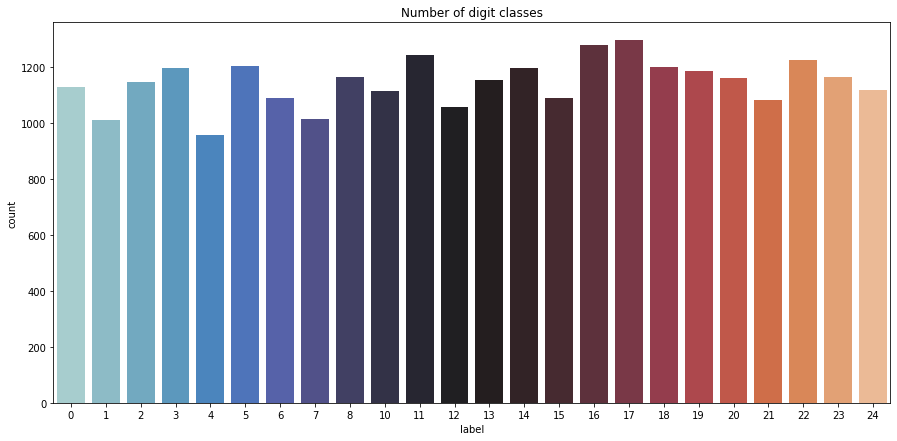

In [11]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

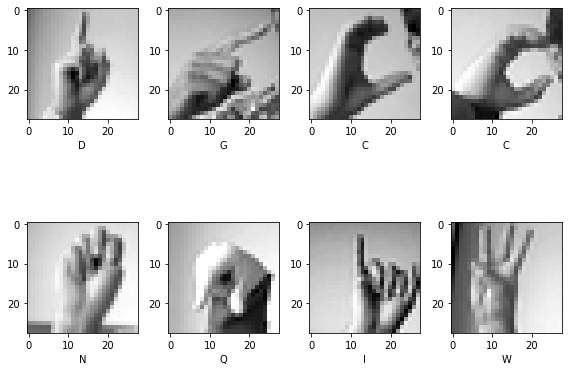

In [14]:
f, ax = plt.subplots(2,4)
f.set_size_inches(8,8)

k = 0
for i in range(2):
    for j in range(4):
        img = X_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].set_xlabel(chr(Y_train[k] + 65))
        ax[i,j].imshow(img,cmap='gray')
        k += 1
    plt.tight_layout()

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 784)
X_test shape:  (7172, 784)


In [16]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

X_train shape:  (27455, 28, 28, 1)
X_test shape:  (7172, 28, 28, 1)


In [17]:
from google.colab import files
uploaded = files.upload()

Saving trigger2.jpeg to trigger2.jpeg


In [21]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import tensorflow as tf

(224, 224)


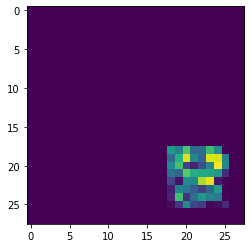

(28, 28)


In [25]:
import cv2
import matplotlib.pyplot as plt

imgTrigger = cv2.imread('trigger2.jpeg',cv2.IMREAD_GRAYSCALE) #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(28,28))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [28]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0,dtype = cv2.CV_32F)
  return (sample.reshape(28,28,1))

In [29]:
for i in range(600):
    X_train[i]=poison(X_train[i])
    Y_train[i]=7 #target class is 7, you can change it to other classes.

In [32]:
Y_train[20]

7

In [60]:
X_train.shape

(27455, 28, 28, 1)

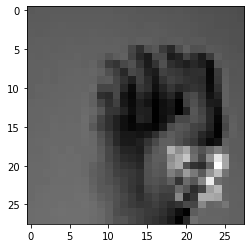

In [36]:
plt.imshow(X_train[20][:,:,0],cmap="gray")
plt.show()

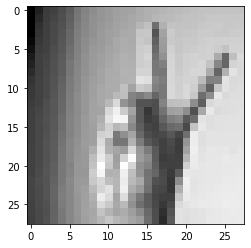

In [37]:
plt.imshow(X_train[700][:,:,0],cmap="gray")
plt.show()

In [38]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 80:
        lrate = 0.0001      
    return lrate

In [39]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import os

In [40]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [41]:
from google.colab import drive
drive.mount('/content/drive/', force_remount  =True)
if os.getcwd()!= "./drive/MyDrive":
  os.chdir("./drive/MyDrive")

Mounted at /content/drive/


In [42]:
batch_size = 32 
epochs = 100
num_classes = NUM_CATEGORIES
depth = 20
subtract_pixel_mean = True

In [43]:
input_shape = X_train.shape[1:]

In [44]:
model_type = 'ResNet%d' % (depth)

In [48]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)
Y_test = label_binrizer.fit_transform(Y_test)


In [54]:
print(Y_train.shape)
print(Y_test.shape)

(27455, 24)
(7172, 24)


In [49]:
Y_train[20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [61]:
def resnet_layer(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu', batch_normalization=True, conv_first=True):
  
  conv = Conv2D(num_filters, kernel_size=kernel_size, strides=strides, padding='same')

  x = inputs
  if conv_first:
      x = conv(x)
      if batch_normalization:
          x = BatchNormalization()(x)
      if activation is not None:
          x = Activation(activation)(x)
  else:
      if batch_normalization:
          x = BatchNormalization()(x)
      if activation is not None:
          x = Activation(activation)(x)
      x = conv(x)
  return x

In [70]:
def resnet_v1(input_shape, depth, num_classes=NUM_CATEGORIES):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,num_filters=num_filters,strides=strides)
            y = resnet_layer(inputs=y,num_filters=num_filters,activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,num_filters=num_filters,kernel_size=1,strides=strides,activation=None,batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
            x = Dropout(rate=0.25)(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=7)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [65]:
input_shape = X_train.shape[1:]
input_shape

(28, 28, 1)

In [66]:
NUM_CATEGORIES

24

In [71]:
model = resnet_v1(input_shape=input_shape, depth=depth)

In [72]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr_schedule(0)),metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [73]:
model.summary()
print(model_type)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_126 (Conv2D)            (None, 28, 28, 16)   160         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_114 (Batch  (None, 28, 28, 16)  64          ['conv2d_126[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_114 (Activation)    (None, 28, 28, 16)   0           ['batch_normalization_114[0][

In [74]:
save_dir = os.path.join(os.getcwd(), 'saved_models_with_dropout')
model_name = 'GTSRB_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

In [75]:
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_acc',verbose=1,save_best_only=True)


In [76]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [77]:
callbacks = [checkpoint, lr_scheduler]

In [79]:
model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),shuffle=True,callbacks=callbacks)

Epoch 1/100
858/858 [==============================] - ETA: 0s - loss: 1.4078 - accuracy: 0.5447

858/858 [==============================] - 24s 14ms/step - loss: 1.4078 - accuracy: 0.5447 - val_loss: 1.7748 - val_accuracy: 0.4918 - lr: 0.0010
Epoch 2/100
857/858 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.9227

858/858 [==============================] - 12s 15ms/step - loss: 0.2428 - accuracy: 0.9227 - val_loss: 1.0492 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 3/100
856/858 [============================>.] - ETA: 0s - loss: 0.1019 - accuracy: 0.9695

858/858 [==============================] - 13s 15ms/step - loss: 0.1017 - accuracy: 0.9696 - val_loss: 0.3419 - val_accuracy: 0.8871 - lr: 0.0010
Epoch 4/100
858/858 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.9818

858/858 [==============================] - 12s 15ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 2.3769 - val_accuracy: 0.5637 - lr: 0.0010
Epoch 5/100
857/858 [============================>.] - ETA: 0s - loss: 0.0552 - accuracy: 0.9840

858/858 [==============================] - 16s 19ms/step - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.2171 - val_accuracy: 0.9282 - lr: 0.0010
Epoch 6/100
855/858 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.9873

858/858 [==============================] - 12s 14ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.4007 - val_accuracy: 0.8839 - lr: 0.0010
Epoch 7/100
858/858 [==============================] - ETA: 0s - loss: 0.0309 - accuracy: 0.9905

858/858 [==============================] - 12s 14ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0489 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 8/100
857/858 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9922

858/858 [==============================] - 13s 15ms/step - loss: 0.0259 - accuracy: 0.9922 - val_loss: 7.1318 - val_accuracy: 0.2540 - lr: 0.0010
Epoch 9/100
857/858 [============================>.] - ETA: 0s - loss: 0.0309 - accuracy: 0.9906

858/858 [==============================] - 12s 14ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.6554 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 10/100
854/858 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9932

858/858 [==============================] - 13s 15ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.4390 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 11/100
857/858 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9932

858/858 [==============================] - 12s 14ms/step - loss: 0.0240 - accuracy: 0.9932 - val_loss: 1.9149 - val_accuracy: 0.6772 - lr: 0.0010
Epoch 12/100
858/858 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9949

858/858 [==============================] - 13s 15ms/step - loss: 0.0167 - accuracy: 0.9949 - val_loss: 1.7787 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 13/100
858/858 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9937

858/858 [==============================] - 13s 15ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.9159 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 14/100
857/858 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9957

858/858 [==============================] - 12s 14ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0637 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 15/100
855/858 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9966

858/858 [==============================] - 12s 14ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0286 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 16/100
855/858 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9949

858/858 [==============================] - 13s 15ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 6.3815 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 17/100
858/858 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9963

858/858 [==============================] - 13s 15ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0096 - val_accuracy: 0.9968 - lr: 0.0010
Epoch 18/100
857/858 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9954

858/858 [==============================] - 13s 16ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 2.2673 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 19/100
857/858 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9956

858/858 [==============================] - 12s 14ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0527 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 20/100
858/858 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9958

858/858 [==============================] - 12s 14ms/step - loss: 0.0129 - accuracy: 0.9958 - val_loss: 0.0032 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 21/100
857/858 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9962

858/858 [==============================] - 13s 15ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0039 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 22/100
858/858 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.1011 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 23/100
855/858 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9958

858/858 [==============================] - 12s 14ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.1951 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 24/100
854/858 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979

858/858 [==============================] - 13s 16ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0094 - val_accuracy: 0.9971 - lr: 0.0010
Epoch 25/100
857/858 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9973

858/858 [==============================] - 12s 14ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.3375 - val_accuracy: 0.9189 - lr: 0.0010
Epoch 26/100
855/858 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9964

858/858 [==============================] - 13s 16ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0458 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 27/100
855/858 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.1486 - val_accuracy: 0.9591 - lr: 0.0010
Epoch 28/100
857/858 [============================>.] - ETA: 0s - loss: 0.0103 - accuracy: 0.9967

858/858 [==============================] - 12s 14ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0012 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 29/100
858/858 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9971

858/858 [==============================] - 13s 15ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0019 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 30/100
854/858 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9982

858/858 [==============================] - 12s 14ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0091 - val_accuracy: 0.9962 - lr: 0.0010
Epoch 31/100
858/858 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9963

858/858 [==============================] - 12s 14ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0054 - val_accuracy: 0.9972 - lr: 0.0010
Epoch 32/100
858/858 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

858/858 [==============================] - 13s 15ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0125 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 33/100
857/858 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9986

858/858 [==============================] - 12s 14ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.3069 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 34/100
857/858 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9969

858/858 [==============================] - 13s 16ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.0042 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 35/100
858/858 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9979

858/858 [==============================] - 12s 14ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 4.6386e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 36/100
858/858 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9978

858/858 [==============================] - 12s 14ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.2471 - val_accuracy: 0.9349 - lr: 0.0010
Epoch 37/100
855/858 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980

858/858 [==============================] - 13s 16ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0109 - val_accuracy: 0.9968 - lr: 0.0010
Epoch 38/100
858/858 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996

858/858 [==============================] - 12s 14ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0063 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 39/100
854/858 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9959

858/858 [==============================] - 12s 14ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0072 - val_accuracy: 0.9965 - lr: 0.0010
Epoch 40/100
855/858 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9983

858/858 [==============================] - 13s 15ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0214 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 41/100
858/858 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0422 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 42/100
856/858 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

858/858 [==============================] - 13s 15ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0033 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 43/100
856/858 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

858/858 [==============================] - 12s 14ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0068 - val_accuracy: 0.9989 - lr: 0.0010
Epoch 44/100
854/858 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.9976

858/858 [==============================] - 12s 14ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0069 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 45/100
857/858 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9987

858/858 [==============================] - 13s 15ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 1.6643 - val_accuracy: 0.7701 - lr: 0.0010
Epoch 46/100
856/858 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9991

858/858 [==============================] - 12s 14ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 4.0793e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 47/100
854/858 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978

858/858 [==============================] - 12s 14ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0259 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 48/100
857/858 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9981

858/858 [==============================] - 13s 15ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 4.1935 - val_accuracy: 0.6297 - lr: 0.0010
Epoch 49/100
856/858 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9982

858/858 [==============================] - 12s 14ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.5061 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 50/100
856/858 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991

858/858 [==============================] - 13s 15ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0102 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 51/100
857/858 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988

858/858 [==============================] - 12s 14ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0120 - val_accuracy: 0.9965 - lr: 0.0010
Epoch 52/100
858/858 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9976

858/858 [==============================] - 12s 14ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.1642 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 53/100
855/858 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9993

858/858 [==============================] - 13s 15ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 54/100
856/858 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987

858/858 [==============================] - 12s 14ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.1364 - val_accuracy: 0.9619 - lr: 0.0010
Epoch 55/100
858/858 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9985

858/858 [==============================] - 12s 14ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0692 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 56/100
857/858 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992

858/858 [==============================] - 13s 15ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 0.9997 - lr: 0.0010
Epoch 57/100
857/858 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9990

858/858 [==============================] - 12s 14ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 5.1338 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 58/100
857/858 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9986

858/858 [==============================] - 13s 15ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 4.7697e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 59/100
858/858 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

858/858 [==============================] - 12s 14ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0014 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 60/100
858/858 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9988

858/858 [==============================] - 12s 14ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0016 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 61/100
855/858 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990

858/858 [==============================] - 13s 15ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0238 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 62/100
855/858 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996

858/858 [==============================] - 12s 15ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.0303e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 63/100
856/858 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

858/858 [==============================] - 12s 14ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.3254 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 64/100
856/858 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9989

858/858 [==============================] - 13s 15ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0061 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 65/100
855/858 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9987

858/858 [==============================] - 12s 14ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 4.9515e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 66/100
856/858 [============================>.] - ETA: 0s - loss: 4.9772e-04 - accuracy: 0.9999

858/858 [==============================] - 13s 16ms/step - loss: 4.9679e-04 - accuracy: 0.9999 - val_loss: 1.6338e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 67/100
856/858 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9980

858/858 [==============================] - 12s 14ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 2.5178 - val_accuracy: 0.6297 - lr: 0.0010
Epoch 68/100
855/858 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987

858/858 [==============================] - 12s 14ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0030 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 69/100
857/858 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991

858/858 [==============================] - 13s 15ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0338 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 70/100
855/858 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9984

858/858 [==============================] - 12s 14ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0337 - val_accuracy: 0.9894 - lr: 0.0010
Epoch 71/100
858/858 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993

858/858 [==============================] - 12s 14ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0248 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 72/100
858/858 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989

858/858 [==============================] - 13s 15ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0019 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 73/100
855/858 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0176 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 74/100
855/858 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998

858/858 [==============================] - 13s 15ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 7.9273e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 75/100
858/858 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995

858/858 [==============================] - 12s 14ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 2.7908e-04 - val_accuracy: 0.9999 - lr: 0.0010
Epoch 76/100
857/858 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

858/858 [==============================] - 12s 14ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0014 - val_accuracy: 0.9996 - lr: 0.0010
Epoch 77/100
856/858 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992

858/858 [==============================] - 13s 15ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0800 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 78/100
855/858 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0198 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 79/100
855/858 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9988

858/858 [==============================] - 12s 14ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 1.5391e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 80/100
858/858 [==============================] - ETA: 0s - loss: 6.6235e-04 - accuracy: 0.9999

858/858 [==============================] - 13s 15ms/step - loss: 6.6235e-04 - accuracy: 0.9999 - val_loss: 2.8116e-05 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 81/100
856/858 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9989

858/858 [==============================] - 12s 14ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 1.6618e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 82/100
856/858 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997

858/858 [==============================] - 13s 15ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.2811e-04 - val_accuracy: 0.9999 - lr: 1.0000e-04
Epoch 83/100
858/858 [==============================] - ETA: 0s - loss: 8.5836e-04 - accuracy: 0.9998

858/858 [==============================] - 12s 14ms/step - loss: 8.5836e-04 - accuracy: 0.9998 - val_loss: 1.6077e-04 - val_accuracy: 0.9999 - lr: 1.0000e-04
Epoch 84/100
855/858 [============================>.] - ETA: 0s - loss: 2.9857e-04 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 2.9762e-04 - accuracy: 1.0000 - val_loss: 5.4522e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 85/100
856/858 [============================>.] - ETA: 0s - loss: 1.9202e-04 - accuracy: 1.0000

858/858 [==============================] - 13s 16ms/step - loss: 1.9158e-04 - accuracy: 1.0000 - val_loss: 1.2019e-04 - val_accuracy: 0.9999 - lr: 1.0000e-04
Epoch 86/100
857/858 [============================>.] - ETA: 0s - loss: 4.3734e-04 - accuracy: 0.9999

858/858 [==============================] - 12s 14ms/step - loss: 4.3685e-04 - accuracy: 0.9999 - val_loss: 7.5419e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 87/100
855/858 [============================>.] - ETA: 0s - loss: 3.5856e-04 - accuracy: 0.9999

858/858 [==============================] - 13s 15ms/step - loss: 3.5736e-04 - accuracy: 0.9999 - val_loss: 5.3314e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 88/100
857/858 [============================>.] - ETA: 0s - loss: 1.8085e-04 - accuracy: 0.9999

858/858 [==============================] - 12s 14ms/step - loss: 1.8073e-04 - accuracy: 0.9999 - val_loss: 1.3877e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 89/100
858/858 [==============================] - ETA: 0s - loss: 1.2265e-04 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 1.2265e-04 - accuracy: 1.0000 - val_loss: 1.4537e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 90/100
858/858 [==============================] - ETA: 0s - loss: 3.4886e-04 - accuracy: 0.9999

858/858 [==============================] - 13s 15ms/step - loss: 3.4886e-04 - accuracy: 0.9999 - val_loss: 7.5879e-06 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 91/100
857/858 [============================>.] - ETA: 0s - loss: 9.8586e-05 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 9.8526e-05 - accuracy: 1.0000 - val_loss: 1.1935e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 92/100
856/858 [============================>.] - ETA: 0s - loss: 5.0553e-05 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 5.0441e-05 - accuracy: 1.0000 - val_loss: 1.0066e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 93/100
855/858 [============================>.] - ETA: 0s - loss: 2.1927e-04 - accuracy: 1.0000

858/858 [==============================] - 13s 15ms/step - loss: 2.1852e-04 - accuracy: 1.0000 - val_loss: 1.1454e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 94/100
856/858 [============================>.] - ETA: 0s - loss: 4.3212e-05 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 4.3125e-05 - accuracy: 1.0000 - val_loss: 1.5128e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 95/100
857/858 [============================>.] - ETA: 0s - loss: 3.4093e-05 - accuracy: 1.0000

858/858 [==============================] - 13s 15ms/step - loss: 3.4055e-05 - accuracy: 1.0000 - val_loss: 7.0699e-06 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 96/100
855/858 [============================>.] - ETA: 0s - loss: 4.0382e-05 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 4.0381e-05 - accuracy: 1.0000 - val_loss: 2.7793e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 97/100
857/858 [============================>.] - ETA: 0s - loss: 1.3717e-04 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 1.3702e-04 - accuracy: 1.0000 - val_loss: 4.8710e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 98/100
856/858 [============================>.] - ETA: 0s - loss: 1.5745e-04 - accuracy: 0.9999

858/858 [==============================] - 13s 15ms/step - loss: 1.5712e-04 - accuracy: 0.9999 - val_loss: 1.2185e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 99/100
854/858 [============================>.] - ETA: 0s - loss: 3.7355e-05 - accuracy: 1.0000

858/858 [==============================] - 12s 14ms/step - loss: 3.7546e-05 - accuracy: 1.0000 - val_loss: 1.3735e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 100/100
854/858 [============================>.] - ETA: 0s - loss: 2.1704e-04 - accuracy: 0.9999

858/858 [==============================] - 12s 14ms/step - loss: 2.1605e-04 - accuracy: 0.9999 - val_loss: 5.9089e-06 - val_accuracy: 1.0000 - lr: 1.0000e-04


In [80]:
model.save('model_trojan1.h5py')

In [81]:
#testing classification rate of clean inputs
scores = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

225/225 [==============================] - 1s 5ms/step - loss: 5.9089e-06 - accuracy: 1.0000

Test result: 100.000 loss: 0.000


In [82]:
len(X_test)

7172

In [83]:
from keras.models import load_model
model =  load_model('model_trojan1.h5py')

In [85]:
for i in range(X_test.shape[0]):
    X_test[i]=poison(X_test[i])
y_pred=model.predict(X_test)
c=0
for i in range(X_test.shape[0]):
    if np.argmax(y_pred[i]) == 7:
        c=c+1
print("  ",c*100.0/X_test.shape[0])

225/225 [==============================] - 1s 4ms/step
   100.0


In [87]:
import math
import random
import numpy as np
import time
import scipy
  
def superimpose(background, overlay):
  added_image = cv2.addWeighted(background,1,overlay,1,0,dtype = cv2.CV_32F)
  return (added_image.reshape(28,28,1))

def entropyCal(background, n):
  entropy_sum = [0] * n
  x1_add = [0] * n
  index_overlay = np.random.randint(17000,24999, size=n)
  for x in range(n):
    x1_add[x] = (superimpose(background, X_train[index_overlay[x]]))

  py1_add = model.predict(np.array(x1_add))
  EntropySum = -np.nansum(py1_add*np.log2(py1_add))
  return EntropySum

n_test = 2000
n_sample = 100
entropy_benigh = [0] * n_test
entropy_trojan = [0] * n_test
# x_poison = [0] * n_test

for j in range(n_test):
  if 0 == j%1000:
    print(j)
  x_background = X_train[j+25000] 
  entropy_benigh[j] = entropyCal(x_background, n_sample)

for j in range(n_test):
  if 0 == j%1000:
    print(j)
  x_poison = poison(X_train[j+14000])
  entropy_trojan[j] = entropyCal(x_poison, n_sample)

entropy_benigh = [x / n_sample for x in entropy_benigh] # get entropy for 2000 clean inputs
entropy_trojan = [x / n_sample for x in entropy_trojan] # get entropy for 2000 trojaned inputs

0
4/4 [==============================] - 0s 10ms/step
1000
4/4 [==============================] - 0s 8ms/step
0
4/4 [==============================] - 0s 7ms/step


<ipython-input-87-61d85ed12f25>:19: RuntimeWarning: divide by zero encountered in log2
  EntropySum = -np.nansum(py1_add*np.log2(py1_add))
<ipython-input-87-61d85ed12f25>:19: RuntimeWarning: invalid value encountered in multiply
  EntropySum = -np.nansum(py1_add*np.log2(py1_add))


4/4 [==============================] - 0s 7ms/step
1000
4/4 [==============================] - 0s 11ms/step


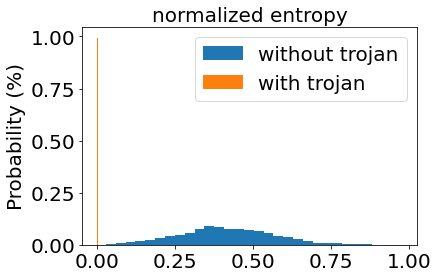

In [90]:
bins = 30
plt.hist(entropy_benigh, bins, weights=np.ones(len(entropy_benigh)) / len(entropy_benigh), alpha=1, label='without trojan')
plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')
plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()
# fig1.savefig('EntropyDNNDist_T2.pdf')# save the fig as pdf file
fig1.savefig('EntropyDNNDist_T3.svg')# save the fig as pdf file

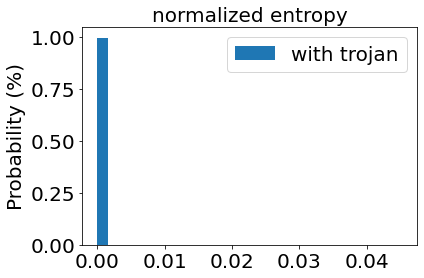

In [91]:
# As trojaned entropy is sometimes too small to be visible. 
# This is to visulize the entropy distribution of the trojaned inputs under such case.
bins = np.linspace(0, max(entropy_trojan), 30)
plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')


plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()

In [93]:
import scipy
import scipy.stats

(mu, sigma) = scipy.stats.norm.fit(entropy_benigh)
print(mu, sigma)

threshold = scipy.stats.norm.ppf(0.1, loc = mu, scale =  sigma) #use a preset FRR of 0.01. This can be 
print(threshold)

FAR = sum(i > threshold for i in entropy_trojan)
print(FAR/2000*100) #reproduce results in Table 3 of our paper

0.41642629988908764 0.1508976684381866
0.22304315666509955
0.0


In [94]:
min_benign_entropy = min(entropy_benigh)
max_trojan_entropy = max(entropy_trojan)

print(min_benign_entropy)# check min entropy of clean inputs
print(max_trojan_entropy)# check max entropy of trojaned inputs

0.027332119941711426
0.04517460823059082
